In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data using URL
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df=pd.read_csv(url,index_col='Month',parse_dates=['Month'])

In [3]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


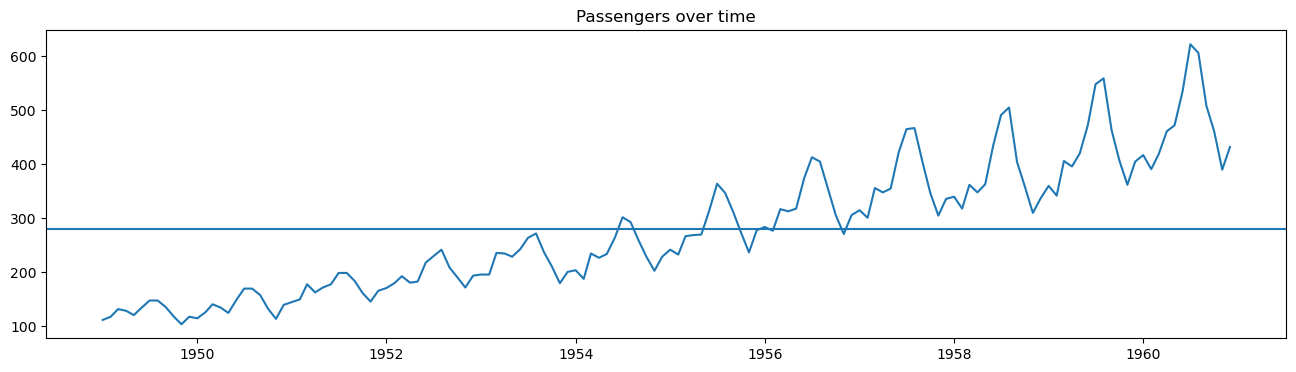

In [7]:
#Line plot chart
plt.figure(figsize=(16,4))
plt.plot(df['Passengers'])
plt.title('Passengers over time')
plt.axhline(df['Passengers'].mean())#overall average shows here
plt.show()

In [11]:
#Moving Average plot
df['Moving Average']=df['Passengers'].rolling(window=5).mean()

In [13]:
df

,Passengers,Moving Average
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,122.4
...,...,...
1960-08-01,606,539.2
1960-09-01,508,548.6
1960-10-01,461,546.4


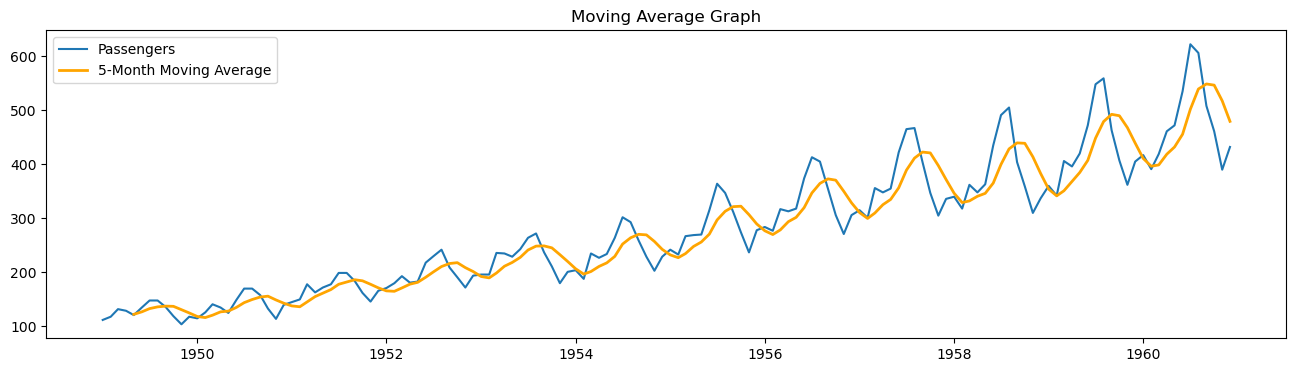

In [15]:
plt.figure(figsize=(16,4))
plt.plot(df['Passengers'],label='Passengers')
plt.plot(df['Moving Average'],label='5-Month Moving Average',color='orange',linewidth=2)
plt.title('Moving Average Graph')
plt.legend()
plt.show()

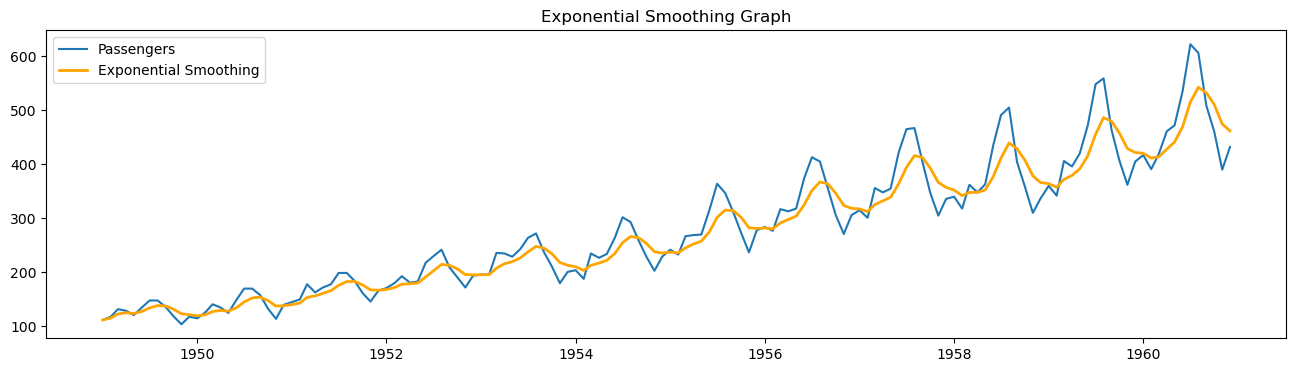

In [17]:
#Exponential Smoothening
df['Exp Smooth']=df['Passengers'].ewm(alpha=0.3).mean()#alpha valu is between 0 to 1
plt.figure(figsize=(16,4))
plt.plot(df['Passengers'],label='Passengers')
plt.plot(df['Exp Smooth'],label='Exponential Smoothing',color='orange',linewidth=2)
plt.title('Exponential Smoothing Graph')
plt.legend()
plt.show()

In [19]:
#Differenced Data
df['Difference']=df['Passengers'].diff(periods=1)

In [21]:
df

,Passengers,Moving Average,Exp Smooth,Difference
Month,,,,
1949-01-01,112,NaN,112.000000,NaN
1949-02-01,118,NaN,115.529412,6.0
1949-03-01,132,NaN,123.050228,14.0
1949-04-01,129,NaN,125.399131,-3.0
1949-05-01,121,122.4,123.812773,-8.0
...,...,...,...,...
1960-08-01,606,539.2,542.383959,-16.0
1960-09-01,508,548.6,532.068772,-98.0
1960-10-01,461,546.4,510.748140,-47.0


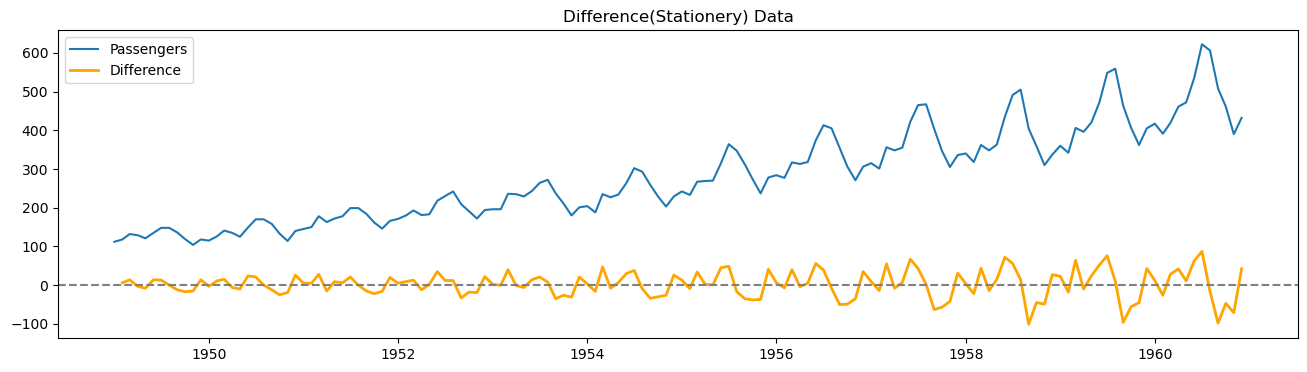

In [23]:
plt.figure(figsize=(16,4))
plt.plot(df['Passengers'],label='Passengers')
plt.plot(df['Difference'],label='Difference',color='orange',linewidth=2)
plt.axhline(0,linestyle='--',color='gray')
plt.title('Difference(Stationery) Data')
plt.legend()
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df['Passengers'],period=12)
residuals=decomp.resid
cycle=residuals.rolling(window=24,center=True).mean()
noise=residuals-cycle

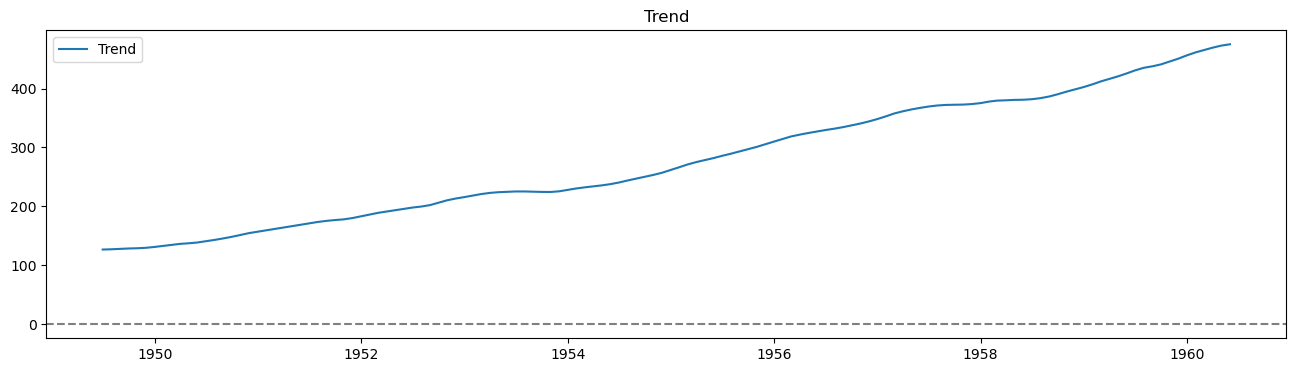

In [27]:
#trend
plt.figure(figsize=(16,4))
plt.plot(decomp.trend,label='Trend')
plt.axhline(0,linestyle='--',color='gray')
plt.title('Trend')
plt.legend()
plt.show()

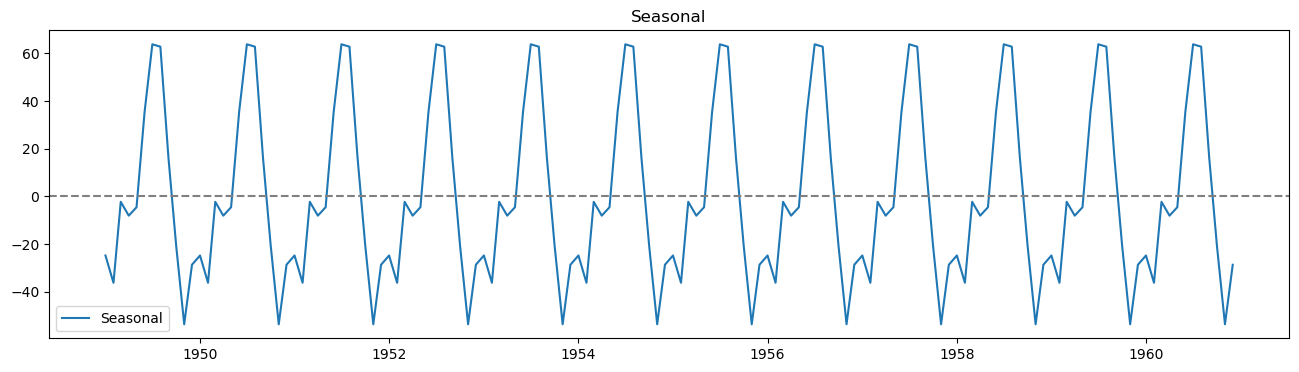

In [29]:
#Seasonality
plt.figure(figsize=(16,4))
plt.plot(decomp.seasonal,label='Seasonal')
plt.axhline(0,linestyle='--',color='gray')
plt.title('Seasonal')
plt.legend()
plt.show()

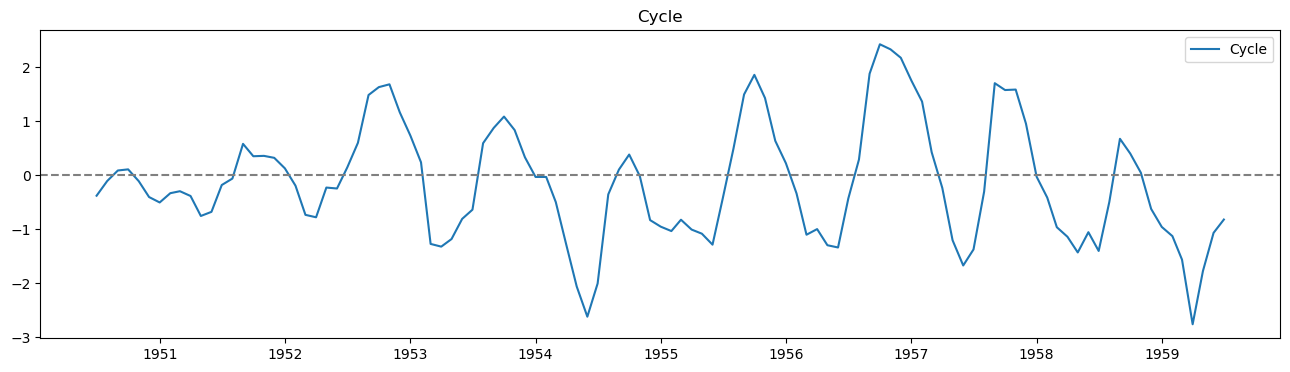

In [30]:
#Cyclic
plt.figure(figsize=(16,4))
plt.plot(cycle,label='Cycle')
plt.axhline(0,linestyle='--',color='gray')
plt.title('Cycle')
plt.legend()
plt.show()

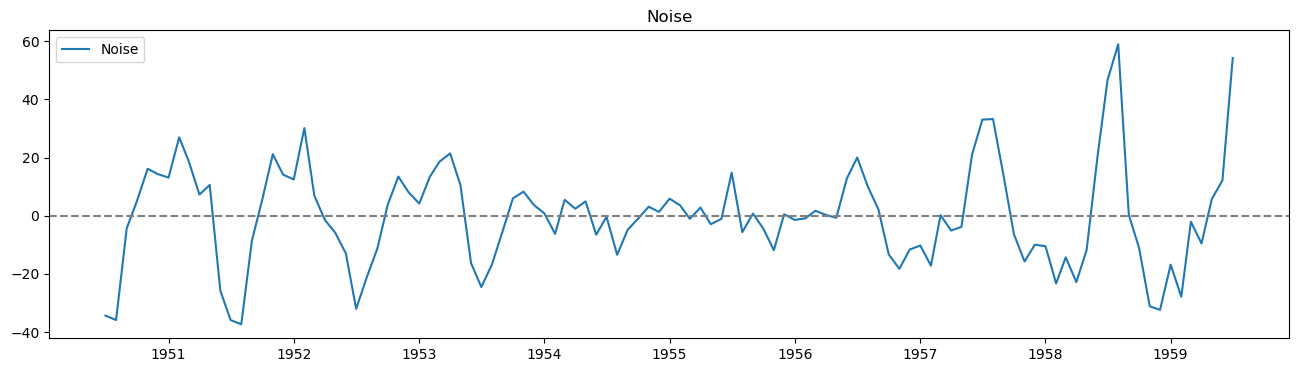

In [32]:
#Noise
plt.figure(figsize=(16,4))
plt.plot(noise,label='Noise')
plt.axhline(0,linestyle='--',color='gray')
plt.title('Noise')
plt.legend()
plt.show()

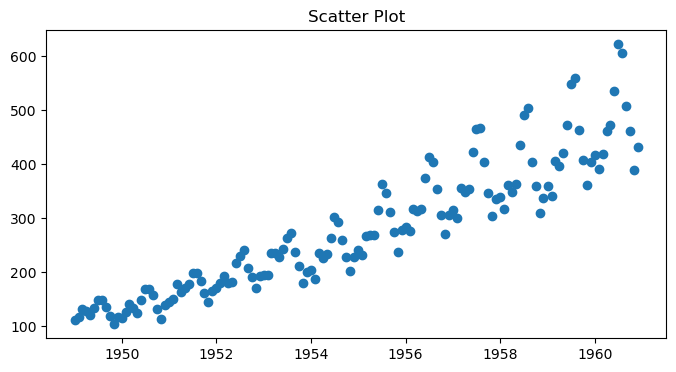

In [34]:
#Scatter Plot
plt.figure(figsize=(8,4))
plt.scatter(df.index,df['Passengers'])
plt.title('Scatter Plot')
plt.show()

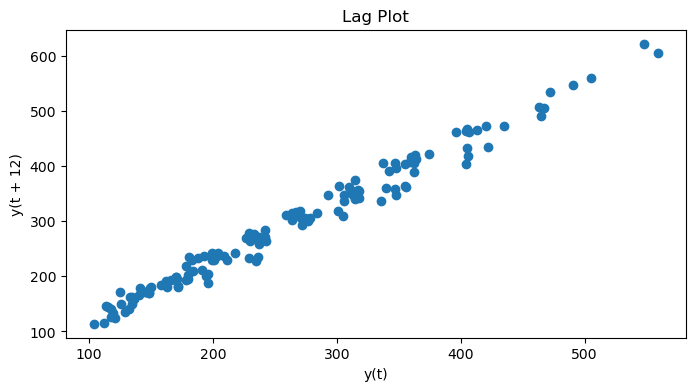

In [36]:
#Lag Plot
from pandas.plotting import lag_plot
plt.figure(figsize=(8,4))
lag_plot(df['Passengers'],lag=12)
plt.title('Lag Plot')
plt.show()

In [39]:
#ACF plot- Auto co-relation function
from statsmodels.tsa.stattools import acf
acf_values=acf(df['Passengers'],nlags=50)

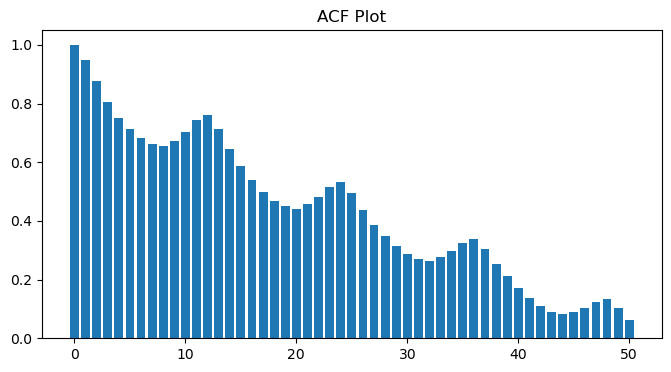

In [41]:

plt.figure(figsize=(8,4))
plt.bar(range(len(acf_values)),acf_values)
plt.title('ACF Plot')
plt.show()

In [43]:
#Forcasting(Split data set)
train=df[['Passengers']][:-12] #last 12 months excluding
test=df[['Passengers']][-12:] #only last 12 months including

In [45]:
#Naive forecast
train['Passengers'].iloc[-1]

405

In [47]:
naive_forecast=[405]*12 #next year 

In [49]:
naive_forecast

[405, 405, 405, 405, 405, 405, 405, 405, 405, 405, 405, 405]

In [51]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(test,naive_forecast)))

RMSE: 102.97653454387881


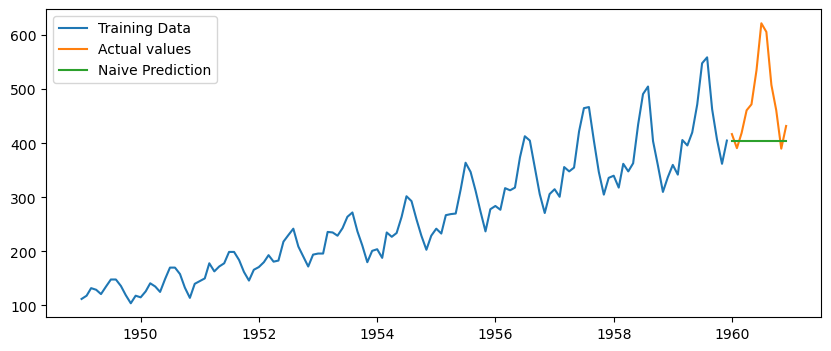

In [53]:
plt.figure(figsize=(10,4))
plt.plot(train,label='Training Data')
plt.plot(test,label='Actual values')
plt.plot(test.index,naive_forecast,label='Naive Prediction')
plt.legend()
plt.show()

RMSE: 17.487527630934014


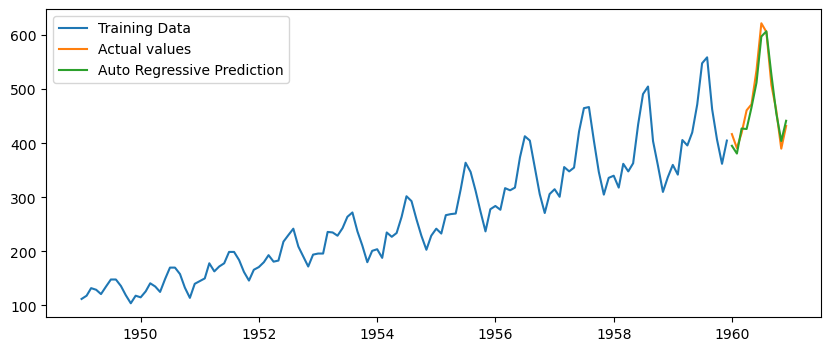

In [55]:
#to doing complecated model here
#Auto regression model
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AutoReg
ar_model=AutoReg(train['Passengers'],lags=12).fit()
ar_pred=ar_model.predict(start=test.index[0],end=test.index[-1])
print('RMSE:',np.sqrt(mean_squared_error(test,ar_pred)))

plt.figure(figsize=(10,4))
plt.plot(train,label='Training Data')
plt.plot(test,label='Actual values')
plt.plot(test.index,ar_pred,label='Auto Regressive Prediction')
plt.legend()
plt.show()

In [59]:
#again more complecated model 
#ARIMA model

from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
warnings.filterwarnings('ignore')
#p = Number of lagged observations (AR part) how many previous months to look for pred
#d = number of difference ( to make our data stationary) how many data should be subtracted
#q = number of past errors(MA part) how many errors to learn from

p=range(0,4)
d=range(0,4)
q=range(0,4)
best_aic=float("inf") #error
best_order=None
for i in itertools.product(p,d,q):
    try:
        model=ARIMA(train['Passengers'],order=i).fit()
        if model.aic<best_aic:
            best_aic=model.aic
            best_order=i
    except:
        continue

In [60]:
print(best_order)

(3, 1, 3)


RMSE: 58.31011655164374


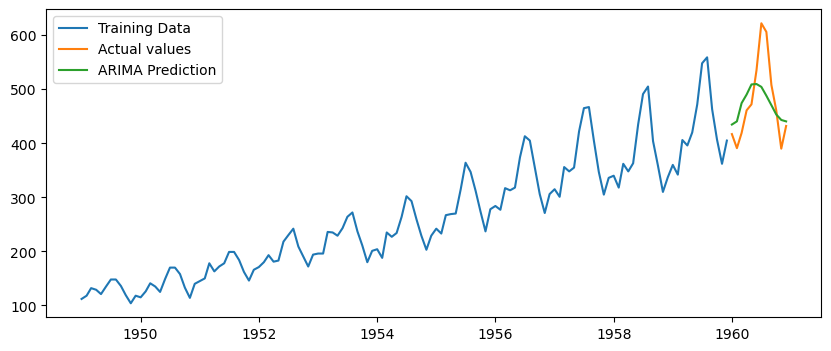

In [66]:
arima_model=ARIMA(train['Passengers'],order=(3,1,3)).fit()
arima_pred=arima_model.get_forecast(steps=len(test)).predicted_mean
print('RMSE:',np.sqrt(mean_squared_error(test,arima_pred)))

plt.figure(figsize=(10,4))
plt.plot(train,label='Training Data')
plt.plot(test,label='Actual values')
plt.plot(test.index,arima_pred,label='ARIMA Prediction')
plt.legend()
plt.show()

RMSE: 15.028218474858962


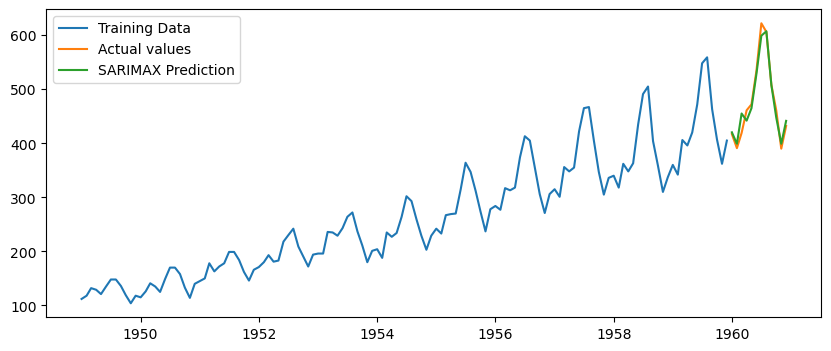

In [72]:
#SARIMAX
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
sarimax_model=SARIMAX(train['Passengers'],order=(3,1,3),seasonal_order=(3,1,3,12)).fit()
sarimax_pred=sarimax_model.forecast(12)
print('RMSE:',np.sqrt(mean_squared_error(test,sarimax_pred)))

plt.figure(figsize=(10,4))
plt.plot(train,label='Training Data')
plt.plot(test,label='Actual values')
plt.plot(test.index,sarimax_pred,label='SARIMAX Prediction')
plt.legend()
plt.show()